In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from peft import PeftModel, PeftConfig

In [2]:
# Load pre-trained base model and tokenizer
model_name = "NousResearch/Llama-2-7b-chat-hf"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, output_hidden_states=True, output_scores=True,cache_dir="/work/qvr905/.cache/huggingface")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/qvr905/.conda/envs/mylay/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/home/qvr905/.conda/envs/mylay/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/home/qvr905/.conda/envs/mylay/lib/p

In [24]:
# Test load with fine tune model from assignment 1
model_name = "NousResearch/Llama-2-7b-chat-hf"
# Load Model with PEFT adapter
model = AutoModelForCausalLM.from_pretrained(model_name, output_hidden_states=True, output_scores=True,cache_dir="/work/qvr905/.cache/huggingface")
tokenizer = AutoTokenizer.from_pretrained(model_name)

peft_model_id = "/work/qvr905/layers/llama2"
model = PeftModel.from_pretrained(model, peft_model_id,cache_dir="./.cache/huggingface")
model = model.merge_and_unload()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/qvr905/.conda/envs/mylay/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/home/qvr905/.conda/envs/mylay/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/home/qvr905/.conda/envs/mylay/lib/p

In [25]:
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
 

In [26]:
ids= tokenizer('tokenization')
ids

{'input_ids': [1, 5993, 2133], 'attention_mask': [1, 1, 1]}

In [27]:
#32 layers
for i, layer in enumerate(model.model.layers):
    print(f'Layer {i}')

Layer 0
Layer 1
Layer 2
Layer 3
Layer 4
Layer 5
Layer 6
Layer 7
Layer 8
Layer 9
Layer 10
Layer 11
Layer 12
Layer 13
Layer 14
Layer 15
Layer 16
Layer 17
Layer 18
Layer 19
Layer 20
Layer 21
Layer 22
Layer 23
Layer 24
Layer 25
Layer 26
Layer 27
Layer 28
Layer 29
Layer 30
Layer 31


In [28]:
sentences = "This is me"

feature_extraction = model(torch.IntTensor([tokenizer(sentences)['input_ids']]),return_dict=True, output_hidden_states=True)['hidden_states']
for layer, tensor in enumerate(feature_extraction):
    print(f"Layer {layer}:")
    print(tensor)  # Print the tensor
    print("Shape:", tensor.shape)  # Print the shape of the tensor

Layer 0:
tensor([[[ 0.0018, -0.0038,  0.0010,  ..., -0.0090,  0.0027, -0.0038],
         [ 0.0088,  0.0028, -0.0131,  ...,  0.0312,  0.0005,  0.0048],
         [-0.0051,  0.0017,  0.0095,  ...,  0.0098, -0.0047, -0.0086],
         [-0.0116, -0.0297,  0.0128,  ..., -0.0195,  0.0159, -0.0093]]])
Shape: torch.Size([1, 4, 4096])
Layer 1:
tensor([[[-0.0150, -0.0156,  0.0520,  ..., -0.0022, -0.0394,  0.0105],
         [ 0.0342, -0.0024, -0.0272,  ...,  0.0956, -0.0077, -0.0114],
         [ 0.0088, -0.0040,  0.0062,  ...,  0.0312,  0.0084, -0.0081],
         [ 0.0144, -0.0579,  0.0095,  ..., -0.0067,  0.0246,  0.0171]]])
Shape: torch.Size([1, 4, 4096])
Layer 2:
tensor([[[ 0.0240, -0.3397,  0.0406,  ...,  0.1935, -0.0367, -0.0622],
         [ 0.0610,  0.0038, -0.0401,  ...,  0.1568, -0.0255,  0.0231],
         [-0.0149,  0.0140,  0.0030,  ...,  0.0585, -0.0199, -0.0089],
         [-0.0047, -0.0443,  0.0361,  ..., -0.0257,  0.0247,  0.0489]]])
Shape: torch.Size([1, 4, 4096])
Layer 3:
tensor([[[

In [29]:
import torch.nn.functional as F
#1 get scores 
input_text = "It was a matter of"
#greedy decoding by calling greedy_search() if num_beams=1 and do_sample=False.
with torch.no_grad():
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    #it has an optional loss, a logits an optional hidden_states and an optional attentions attribute. Here we have the loss since we passed along labels, but we don’t have hidden_states and attentions because we didn’t pass output_hidden_states=True or output_attentions=True.
    outputs = model.generate(input_ids=input_ids,
                    return_dict=True,
                    output_attentions=True,
                    output_hidden_states=True,
                    max_new_tokens=3,
                    return_dict_in_generate=True,
                    output_scores=True
                    )   

    #response = tokenizer.decode(outputs[0], skip_special_tokens=True)       
    #print(response)

/home/qvr905/.conda/envs/mylay/lib/python3.11/site-packages/transformers/generation/utils.py:1197: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


In [30]:
import numpy as np

transition_scores = model.compute_transition_scores(
    outputs.sequences, outputs.scores, normalize_logits=True
)
input_length = 1 if model.config.is_encoder_decoder else input_ids.shape[1]
generated_tokens = outputs.sequences[:, input_length:]
for tok, score in zip(generated_tokens[0], transition_scores[0]):
    # | token | token string | log probability | probability
    print(f"| {tok:5d} | {tokenizer.decode(tok):8s} | {score.numpy():.3f} | {np.exp(score.numpy()):.2%}")

|   931 | time     | -1.734 | 17.65%
|  1434 | before   | -0.557 | 57.27%
|  4856 | someone  | -1.566 | 20.89%


In [31]:
from IPython import display as d
import os
import json
logits_dict = {}
probabilities_dict = {}
top_k = 2
outputs = model.generate(input_ids=input_ids,
                    return_dict_in_generate=True,
                    max_new_tokens=1,
                    output_attentions=True,
                    output_hidden_states=True,
                    top_k=top_k,
                    do_sample=True
                    )  

print(outputs.hidden_states) 
#si max_new_tokens = 1, el hiddenstate tiene 33 tensors, uno por cada layer. 
#si max_new_tokens = 2, el hiddenstate tiene 66 tensors, 33 de un token por cada layer y 33 del otro token por cada layer. 

((tensor([[[ 1.8387e-03, -3.8147e-03,  9.6130e-04,  ..., -9.0332e-03,
           2.6550e-03, -3.7537e-03],
         [ 1.5381e-02, -1.4038e-02,  1.6846e-02,  ..., -2.3041e-03,
          -1.8921e-03, -1.1536e-02],
         [-1.2695e-02,  1.3489e-02, -9.9487e-03,  ..., -7.0095e-05,
           9.6436e-03, -2.6398e-03],
         [-1.1063e-03, -2.2736e-03, -1.5198e-02,  ..., -6.4697e-03,
           5.9605e-05, -3.9368e-03],
         [ 2.5482e-03,  1.4221e-02,  6.2561e-03,  ..., -1.2451e-02,
           2.1729e-02,  1.5106e-03],
         [-2.1210e-03, -5.7983e-03, -2.9449e-03,  ...,  2.9602e-03,
           7.0496e-03, -2.1515e-03]]]), tensor([[[-1.4997e-02, -1.5639e-02,  5.2031e-02,  ..., -2.2205e-03,
          -3.9355e-02,  1.0548e-02],
         [ 2.3223e-02, -2.1605e-02,  2.2827e-02,  ...,  5.5564e-02,
          -3.4857e-03, -2.7197e-02],
         [-1.1986e-02,  3.1524e-02, -1.4238e-02,  ...,  3.3030e-02,
           2.3878e-02,  5.7170e-03],
         [ 7.6113e-03,  2.0612e-03, -2.1976e-02,  

In [32]:
top_tokens = []
probs = []
data = []
k = top_k #show top 1 candidates for position 5
offset = 0
noInputTokens = 5
position = 5
new_position = position -offset -noInputTokens
# First hidden state of the causal model is the embedding layer, skip i
hidden_states = outputs.hidden_states[0]
hidden_states = outputs.hidden_states[0][1:]
import numpy as np
print(np.shape(hidden_states))
#print(hidden_states) #quedan 32 tensors por cada decoder layer. 
#extract the 6th element from each of the 32 tuples in your initial tuple
extracted_elements = tuple(item[:, 5, :] for item in hidden_states)
print(extracted_elements)

(32, 1, 6, 4096)
(tensor([[ 0.0032, -0.0167, -0.0099,  ...,  0.0172,  0.0101,  0.0115]]), tensor([[-0.0147,  0.0201, -0.0007,  ..., -0.0294, -0.0039, -0.0239]]), tensor([[-0.0205,  0.0733, -0.0399,  ..., -0.0011, -0.0126, -0.0614]]), tensor([[-0.0063,  0.0530, -0.0284,  ...,  0.0851, -0.0615,  0.0286]]), tensor([[ 0.0269,  0.1238, -0.0839,  ...,  0.1579, -0.1170,  0.0340]]), tensor([[ 0.0172,  0.1250,  0.0168,  ...,  0.2221, -0.0942,  0.0166]]), tensor([[ 0.0370,  0.0568,  0.0220,  ...,  0.2184, -0.0348,  0.0154]]), tensor([[ 0.0353,  0.0593,  0.0248,  ...,  0.1485,  0.0811, -0.0674]]), tensor([[ 0.1654,  0.2006,  0.0637,  ...,  0.1399,  0.1175, -0.0499]]), tensor([[ 0.1187,  0.1927,  0.0101,  ...,  0.1428,  0.0142, -0.0863]]), tensor([[ 0.1773,  0.3176, -0.1000,  ..., -0.0524,  0.0962,  0.0041]]), tensor([[ 0.2292,  0.3920, -0.1893,  ..., -0.1595,  0.0500, -0.0638]]), tensor([[ 0.0633,  0.2192, -0.1570,  ...,  0.0912, -0.0517, -0.1534]]), tensor([[-0.1021,  0.2511, -0.2208,  ..., -0.0

In [33]:
# loop through layer levels
for layer_no, h in enumerate(extracted_elements):
    # Use lm_head to project the layer's hidden state to output vocabulary
    print("Layer:",layer_no)
    h = h.squeeze() #para quitar la dimension 1 x 4069 y que quede 4069 unicamente. 
    print(h.shape)
    logits = model.lm_head(h)
    print(logits)
    softmax = F.softmax(logits, dim=-1)
    print(softmax)
    sorted_softmax = (torch.argsort(softmax))
    print(sorted_softmax)
    layer_top_tokens = [tokenizer.decode(t) for t in sorted_softmax[-k:]][::-1]
    print("Tokens: ",layer_top_tokens)
    top_tokens.append(layer_top_tokens)
    layer_probs = softmax[sorted_softmax[-k:]].cpu().detach().numpy()[::-1]
    print(layer_probs)
    probs.append(layer_probs.tolist())

Layer: 0
torch.Size([4096])
tensor([-0.0012,  0.0418, -0.0314,  ..., -0.0548,  0.0469, -0.0421])
tensor([3.2175e-05, 3.3589e-05, 3.1218e-05,  ..., 3.0496e-05, 3.3760e-05,
        3.0885e-05])
tensor([ 3995, 26077, 13510,  ...,   313, 29889,   297])
Tokens:  ['in', '.']
[4.3009986e-05 4.1863430e-05]
Layer: 1
torch.Size([4096])
tensor([-0.0188, -0.0353, -0.0197,  ..., -0.0216, -0.0028, -0.0797])
tensor([3.1252e-05, 3.0738e-05, 3.1224e-05,  ..., 3.1162e-05, 3.1755e-05,
        2.9405e-05])
tensor([13510, 26709, 28063,  ..., 18627, 31017,  3236])
Tokens:  ['course', 'ﬁ']
[3.7681322e-05 3.7653757e-05]
Layer: 2
torch.Size([4096])
tensor([ 0.0096, -0.0798, -0.0838,  ..., -0.0217, -0.0802, -0.0396])
tensor([3.1861e-05, 2.9135e-05, 2.9021e-05,  ..., 3.0879e-05, 2.9124e-05,
        3.0333e-05])
tensor([ 7384,  5770, 29221,  ...,  7812, 18627, 23652])
Tokens:  ['itore', 'Hinweis']
[4.0758841e-05 3.9229515e-05]
Layer: 3
torch.Size([4096])
tensor([ 0.0978, -0.0837, -0.0649,  ...,  0.0903, -0.0583, 

In [34]:
#visualize
import pandas as pd 
# Flatten the list of lists into a single list
top_tokens_flatten = [item for sublist in top_tokens for item in sublist]
# Get distinct values using set()
distinct_values = set(top_tokens_flatten)
#print(distinct_values)
list_of_tokens = top_tokens
list_of_probabilities = probs

result = []
for i, (list_of_tokens, list_of_probabilities) in enumerate(zip(list_of_tokens, list_of_probabilities)):
    for token, prob in zip(list_of_tokens, list_of_probabilities):
        result.append({'list': i, 'token': token, 'prob': prob})


/tmp/ipykernel_103739/1025037023.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table = table.fillna(0)
/home/qvr905/.conda/envs/mylay/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  fig.canvas.draw()
/home/qvr905/.conda/envs/mylay/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


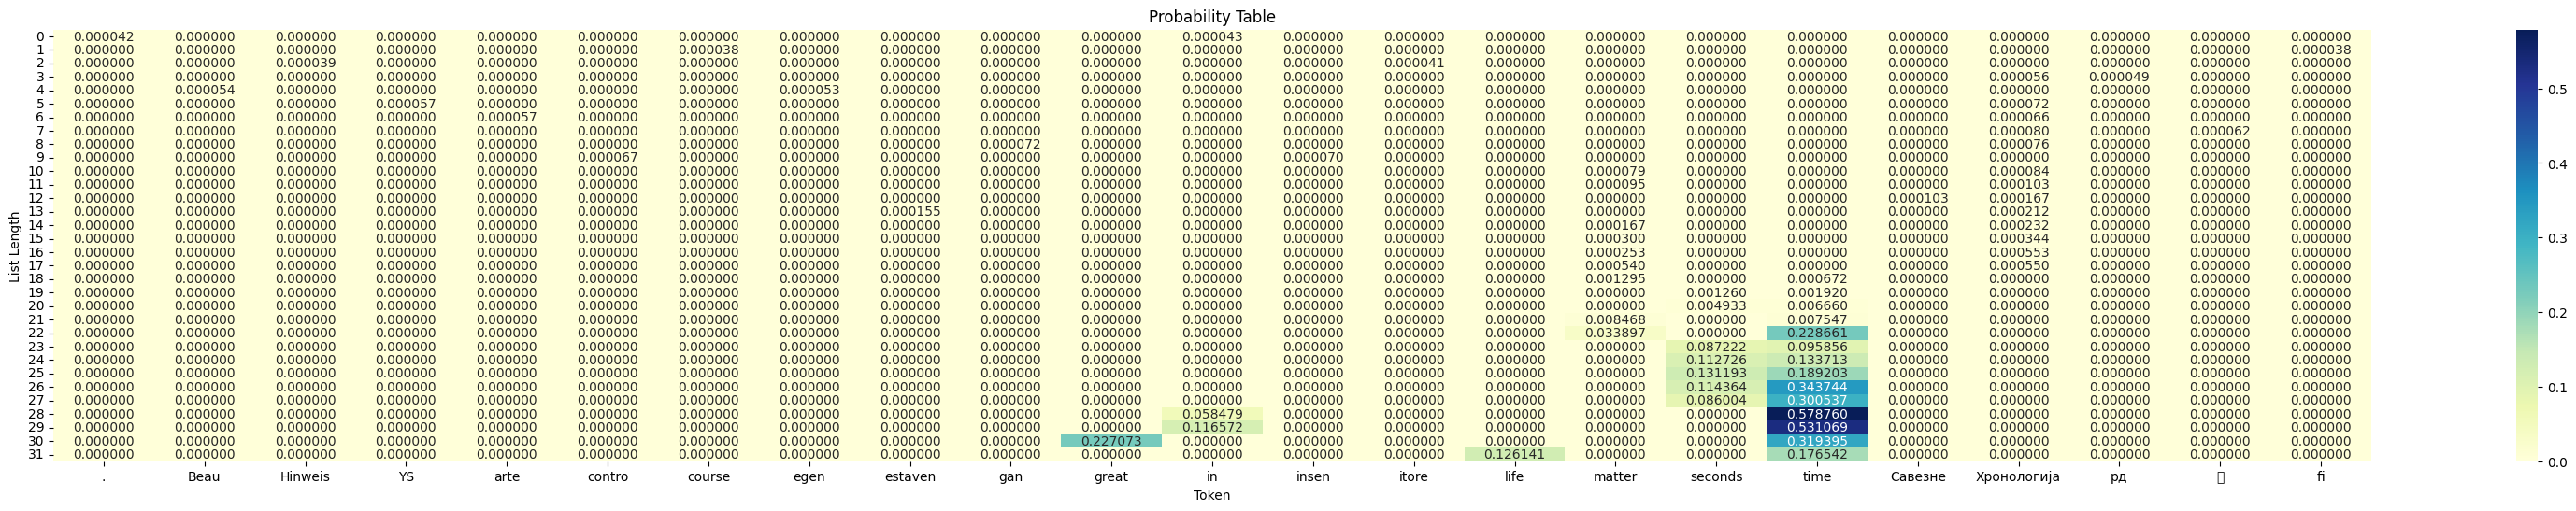

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the result list into a DataFrame
df = pd.DataFrame(result)

# Get unique values of 'list' and 'token' columns
list_values = sorted(df['list'].unique())
token_values = sorted(df['token'].unique())

# Create an empty DataFrame with rows and columns as specified
table = pd.DataFrame(index=list_values, columns=token_values)

# Fill the table with values from the result
for index, row in df.iterrows():
    table.loc[row['list'], row['token']] = row['prob']

# Fill NaN values with 0
table = table.fillna(0)

# Use heatmap to visualize the table
plt.figure(figsize=(40, 6))
sns.heatmap(table, annot=True, cmap='YlGnBu', fmt=".6f")
plt.title('Probability Table')
plt.xlabel('Token')
plt.ylabel('List Length')
plt.show()

In [36]:
from tqdm import tqdm
import evaluate
from codebleu import calc_codebleu
from bert_score import score as bert_score

# Load evaluation metrics
bleu_metric = evaluate.load("bleu")
rouge_metric = evaluate.load("rouge")
bert_metric = evaluate.load("bertscore")
codebleu_metric = evaluate.load("k4black/codebleu")

def evaluate(predictions, references,model):    
    # Compute BERTScore
    bert_score_precision, bert_score_recall, bert_score_f1 = bert_score(predictions, references, lang="en", verbose=False)
    # Compute BLEU
    bleu_score = bleu_metric.compute(predictions=predictions, references=references,smooth=True)['bleu']
    
    # Compute Rouge-L
    rouge_score = rouge_metric.compute(predictions=predictions, references=references)['rougeL']
    
    codebleu = calc_codebleu(references, predictions, lang="python", weights=(0.25, 0.25, 0.25, 0.25), tokenizer=None)
    return bleu_score, rouge_score,codebleu, bert_score_precision, bert_score_recall, bert_score_f1

In [38]:

#def getOutputbyLayer(layername, input, maxtokens):
input_text = "Finish a Python program to select all employees with a salary greater than 10,000 SELECT *"

logits_dict = {}
probabilities_dict = {}
top_k = 3
#1.change max tokens depending on how many tokens you need to generate
max_new_tokens = 13
#greedy decoding by calling greedy_search() if num_beams=1 and do_sample=False.
with torch.no_grad():
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    #Get number of tokens in input 
    num_tokens_input = input_ids.size(1)
    #print(input_ids.size(1))
    outputs = model.generate(input_ids=input_ids,
                        return_dict_in_generate=True,
                        max_new_tokens=max_new_tokens,
                        output_attentions=True,
                        output_hidden_states=True,
                        top_k=top_k,
                        do_sample=True
                        )  

top_tokens = []
probs = []
data = []
k = top_k #show top 1 candidates for position 5

#Primer token tiene los 20 otros tokens de inicio 
#shape de hidden_states_0 es (32, 1, 20, 4096)
# First hidden state of the causal model is the embedding layer, skip i
hidden_states0 = outputs.hidden_states[0]
hidden_states0 = outputs.hidden_states[0][1:]

#Tokens despues del primero, solo tienen ese token. 
#el shape hidden_statesN es (32, 1, 1, 4096)
hidden_states_dict = {}
if max_new_tokens > 1: 
    for i in range(max_new_tokens - 1):  # Assuming max_new_tokens is an integer
        hidden_states_dict[f'hidden_state{i+1}'] = outputs.hidden_states[i+1][1:]
        
print("len",len(hidden_states_dict))

import numpy as np
print(np.shape(hidden_states))
print(np.shape(hidden_states_dict['hidden_state1']))
position = num_tokens_input -1
#extract the last element from each of the 32 tuples in your initial tuple
#the last elemnt are the new generated tokens for first position. 
extracted_elements_0 = tuple(item[:, position, :] for item in hidden_states0)
print(extracted_elements)

extracted_element_dict = {}
if max_new_tokens > 1:
    for i in range(len(hidden_states_dict)): 
        extracted_element_dict[f'extracted_element{i+1}'] = tuple(item[:, 0, :] for item in hidden_states_dict[f'hidden_state{i+1}'])
        print(extracted_element_dict['extracted_element1'])
print("len", len(extracted_element_dict))


len 12
(32, 1, 6, 4096)
(32, 1, 1, 4096)
(tensor([[ 0.0032, -0.0167, -0.0099,  ...,  0.0172,  0.0101,  0.0115]]), tensor([[-0.0147,  0.0201, -0.0007,  ..., -0.0294, -0.0039, -0.0239]]), tensor([[-0.0205,  0.0733, -0.0399,  ..., -0.0011, -0.0126, -0.0614]]), tensor([[-0.0063,  0.0530, -0.0284,  ...,  0.0851, -0.0615,  0.0286]]), tensor([[ 0.0269,  0.1238, -0.0839,  ...,  0.1579, -0.1170,  0.0340]]), tensor([[ 0.0172,  0.1250,  0.0168,  ...,  0.2221, -0.0942,  0.0166]]), tensor([[ 0.0370,  0.0568,  0.0220,  ...,  0.2184, -0.0348,  0.0154]]), tensor([[ 0.0353,  0.0593,  0.0248,  ...,  0.1485,  0.0811, -0.0674]]), tensor([[ 0.1654,  0.2006,  0.0637,  ...,  0.1399,  0.1175, -0.0499]]), tensor([[ 0.1187,  0.1927,  0.0101,  ...,  0.1428,  0.0142, -0.0863]]), tensor([[ 0.1773,  0.3176, -0.1000,  ..., -0.0524,  0.0962,  0.0041]]), tensor([[ 0.2292,  0.3920, -0.1893,  ..., -0.1595,  0.0500, -0.0638]]), tensor([[ 0.0633,  0.2192, -0.1570,  ...,  0.0912, -0.0517, -0.1534]]), tensor([[-0.1021,  0.2

In [39]:
import numpy as np

transition_scores = model.compute_transition_scores(
    outputs.sequences, outputs.scores, normalize_logits=True
)
input_length = 1 if model.config.is_encoder_decoder else input_ids.shape[1]
generated_tokens = outputs.sequences[:, input_length:]
for tok, score in zip(generated_tokens[0], transition_scores[0]):
    # | token | token string | log probability | probability
    print(f"| {tok:5d} | {tokenizer.decode(tok):8s} | {score.numpy():.3f} | {np.exp(score.numpy()):.2%}")

|    13 | 
        | -1.573 | 20.75%
|    13 | 
        | -0.696 | 49.88%
| 29871 |          | -3.725 | 2.41%
|  3895 | FROM     | -0.015 | 98.50%
| 22873 | employees | -0.217 | 80.52%
|    13 | 
        | -0.076 | 92.68%
| 29871 |          | -0.246 | 78.20%
|  5754 | WHERE    | -0.004 | 99.57%
|  4497 | sal      | -0.003 | 99.71%
|   653 | ary      | -0.010 | 98.99%
|  1405 | >        | -0.016 | 98.44%
| 29871 |          | -0.050 | 95.10%
| 29896 | 1        | -0.000 | 99.96%


In [42]:


for layer_no, h in enumerate(extracted_elements_0):
    # Use lm_head to project the layer's hidden state to output vocabulary
    print("Layer:",layer_no)
    h = h.squeeze() #para quitar la dimension 1 x 4069 y que quede 4069 unicamente. 
    print(h.shape)
    logits = model.lm_head(h)
    print(logits)
    softmax = F.softmax(logits, dim=-1)
    print(softmax)
    sorted_softmax = (torch.argsort(softmax))
    print(sorted_softmax)
    layer_top_tokens = [tokenizer.decode(t) for t in sorted_softmax[-k:]][::-1]
    print("Tokens:",layer_top_tokens)
    top_tokens.append(layer_top_tokens)
    layer_probs = softmax[sorted_softmax[-k:]].cpu().detach().numpy()[::-1]
    print(layer_probs)
    probs.append(layer_probs.tolist())
    
if (len(extracted_element_dict)>=1): 
    print("ok")
    for i in range(len(extracted_element_dict)): 
       print("len",len(extracted_element_dict[f'extracted_element{i+1}']))
       for layer_no,h in enumerate(extracted_element_dict[f'extracted_element{i+1}']):
            # Use lm_head to project the layer's hidden state to output vocabulary
            print("Layer:",layer_no)
            h = h.squeeze() #para quitar la dimension 1 x 4069 y que quede 4069 unicamente. 
            print(h.shape)
            logits = model.lm_head(h)
            print(logits)
            softmax = F.softmax(logits, dim=-1)
            print(softmax)
            sorted_softmax = (torch.argsort(softmax))
            print(sorted_softmax)
            layer_top_tokens = [tokenizer.decode(t) for t in sorted_softmax[-k:]][::-1]
            print("Tokens:",layer_top_tokens)
            top_tokens.append(layer_top_tokens)
            layer_probs = softmax[sorted_softmax[-k:]].cpu().detach().numpy()[::-1]
            print(layer_probs)
            probs.append(layer_probs.tolist())
        
        


Layer: 0
torch.Size([4096])
tensor([-0.0045,  0.0028, -0.0179,  ..., -0.0248, -0.0032, -0.0554])
tensor([3.1607e-05, 3.1838e-05, 3.1185e-05,  ..., 3.0972e-05, 3.1648e-05,
        3.0037e-05])
tensor([11495,  5991, 11170,  ..., 16088,   322,   297])
Tokens: ['in', 'and', '…']
[3.7165373e-05 3.6481582e-05 3.6366193e-05]
Layer: 1
torch.Size([4096])
tensor([-0.0134, -0.0915, -0.0028,  ...,  0.0477, -0.0426, -0.0426])
tensor([3.1170e-05, 2.8827e-05, 3.1501e-05,  ..., 3.3134e-05, 3.0270e-05,
        3.0272e-05])
tensor([29930, 11495, 19740,  ..., 12166, 11837, 24576])
Tokens: ['estaven', 'reverse', 'hur']
[3.8173079e-05 3.8167978e-05 3.8010527e-05]
Layer: 2
torch.Size([4096])
tensor([-0.0100, -0.1333,  0.0584,  ...,  0.0589, -0.0491, -0.0570])
tensor([3.1119e-05, 2.7507e-05, 3.3320e-05,  ..., 3.3338e-05, 2.9924e-05,
        2.9689e-05])
tensor([10538,  5744, 15792,  ..., 31189, 30030,  5079])
Tokens: ['oli', 'ú', '소']
[4.0527910e-05 4.0323172e-05 4.0312643e-05]
Layer: 3
torch.Size([4096])
te

In [46]:
#2.here you change the layer you want. 
layervalues = [8, 16, 24, 32]

for i in layervalues:
    layer = i 
    #time and death . We the face of over ity
    prediction = []
    print(len(top_tokens))
    if (max_new_tokens>=1): 
        for i in range(max_new_tokens):
            layer_for = layer * (i +1)
            print(i)
            tokens = top_tokens[layer_for-1]
            print(tokens)
            top = tokens[0]
            print(top)
            prediction.append(top)
            
    else: 
        tokens = top_tokens[layer]
        top = tokens[0]
        prediction.append(top)
    #output is from the layer choosen 
    print(f"Output Layer:",' '.join(str(item) for item in prediction))

    print(' '.join(str(item) for item in prediction))
    gt = ["FROM employees WHERE salary > 10000".strip()]
    pred= []
    pred.append(str(' '.join(str(item) for item in prediction)).strip())
    print(pred)
    print(gt)
    print(len(gt))
    print(len(pred))
    # Evaluate how the different layers effect on the different metrics on trained model. 
    bleu, rouge ,codebleu, bert_score_precision, bert_score_recall, bert_score_f1= evaluate(pred, gt,model)
    print("bleu",str(bleu))
    print("rouge",str(rouge))
    print("codebleu",str(codebleu))
    print("bert",bert_score_precision.mean().item(), bert_score_recall.mean().item(), bert_score_f1.mean().item())


832
0
['uti', 'esterni', 'icha']
uti
1
['️', 'filtering', 'pow']
️
2
['FROM', 'from', 'FROM']
FROM
3
['FROM', '\n', '']
FROM
4
['Unterscheidung', 'Hinweis', 'sierp']
Unterscheidung
5
['Unterscheidung', 'Hinweis', 'sierp']
Unterscheidung
6
['Unterscheidung', 'Hinweis', 'Einzeln']
Unterscheidung
7
['\n', 'from', 'from']


8
['Pur', ':@', 'lif']
Pur
9
['Wa', '\\', 'inc']
Wa
10
['select', 'SELECT', 'Select']
select
11
['FROM', '  ', '']
FROM
12
['akte', 'contre', 'burgo']
akte
Output Layer: uti ️ FROM FROM Unterscheidung Unterscheidung Unterscheidung 
 Pur Wa select FROM akte
uti ️ FROM FROM Unterscheidung Unterscheidung Unterscheidung 
 Pur Wa select FROM akte
['uti ️ FROM FROM Unterscheidung Unterscheidung Unterscheidung \n Pur Wa select FROM akte']
['FROM employees WHERE salary > 10000']
1
1


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bleu 0.10390302174233558
rouge 0.12500000000000003
codebleu {'codebleu': 0.2644645037710064, 'ngram_match_score': 0.017033186037639283, 'weighted_ngram_match_score': 0.040824829046386304, 'syntax_match_score': 0.0, 'dataflow_match_score': 0}
bert 0.7244594693183899 0.7963049411773682 0.7586851119995117
832
0
['️', 'filtering', 'pow']
️
1
['FROM', '\n', '']
FROM
2
['Unterscheidung', 'Hinweis', 'sierp']
Unterscheidung
3
['\n', 'from', 'from']


4
['Wa', '\\', 'inc']
Wa
5
['FROM', '  ', '']
FROM
6
['�', 'ậ', 'table']
�
7
['FROM', 'employee', 'WHERE']
FROM
8
['table', 'illes', 'revers']
table
9
['employees', '\n', 'Emp']
employees
10
['hip', 'data', 'onian']
hip
11
['\n', '', ',']


12
['illes', 'ша', 'selection']
illes
Output Layer: ️ FROM Unterscheidung 
 Wa FROM � FROM table employees hip 
 illes
️ FROM Unterscheidung 
 Wa FROM � FROM table employees hip 
 illes
['️ FROM Unterscheidung \n Wa FROM � FROM table employees hip \n illes']
['FROM employees WHERE salary > 10000']
1
1


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bleu 0.12605968092174913
rouge 0.2857142857142857
codebleu {'codebleu': 0.26774152766816367, 'ngram_match_score': 0.022416933501922302, 'weighted_ngram_match_score': 0.048549177170732344, 'syntax_match_score': 0.0, 'dataflow_match_score': 0}
bert 0.7522867321968079 0.7973803281784058 0.7741774320602417
832
0
['FROM', 'from', 'FROM']
FROM
1
['Unterscheidung', 'Hinweis', 'sierp']
Unterscheidung
2
['Pur', ':@', 'lif']
Pur
3
['FROM', '  ', '']
FROM
4
['select', 'emp', 'emp']
select
5
['table', 'illes', 'revers']
table
6
['СР', 'рт', 'aho']
СР
7
['\n', '', ',']


8
['select', 'INCT', 'ус']
select
9
['issen', 'ta', 'select']
issen
10
['by', 'ver', 'ɫ']
by
11
['sal', 'Sal', '']
sal
12
['sal', 'aries', 'ary']
sal
Output Layer: FROM Unterscheidung Pur FROM select table СР 
 select issen by sal sal
FROM Unterscheidung Pur FROM select table СР 
 select issen by sal sal
['FROM Unterscheidung Pur FROM select table СР \n select issen by sal sal']
['FROM employees WHERE salary > 10000']
1
1


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bleu 0.10390302174233558
rouge 0.12500000000000003
codebleu {'codebleu': 0.2644645037710064, 'ngram_match_score': 0.017033186037639283, 'weighted_ngram_match_score': 0.040824829046386304, 'syntax_match_score': 0.0, 'dataflow_match_score': 0}
bert 0.7570738196372986 0.8096486330032349 0.7824791669845581
832
0
['FROM', '\n', '']
FROM
1
['\n', 'from', 'from']


2
['FROM', '  ', '']
FROM
3
['FROM', 'employee', 'WHERE']
FROM
4
['employees', '\n', 'Emp']
employees
5
['\n', '', ',']


6
['', '\n', 'WHERE']

7
['WHERE', 'INNER', 'JOIN']
WHERE
8
['sal', 'Sal', '']
sal
9
['ary', '>', '=']
ary
10
['>', '>=', '<']
>
11
['', '?', '$']

12
['1', '0', '5']
1
Output Layer: FROM 
 FROM FROM employees 
  WHERE sal ary >  1
FROM 
 FROM FROM employees 
  WHERE sal ary >  1
['FROM \n FROM FROM employees \n  WHERE sal ary >  1']
['FROM employees WHERE salary > 10000']
1
1


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bleu 0.2777619034011791
rouge 0.4615384615384615
codebleu {'codebleu': 0.3361632086717063, 'ngram_match_score': 0.12753431387594827, 'weighted_ngram_match_score': 0.21711852081087685, 'syntax_match_score': 0.0, 'dataflow_match_score': 0}
bert 0.8100824356079102 0.8786548972129822 0.8429763913154602


| Layer   | BLEU   | Rouge-L | BERTScore | CodeBLEU |
|---------|--------|---------|-----------|----------|
| Layer 8 | 0.10   | 0.12    | 0.79      | 0.26     |
| Layer 16| 0.13   | 0.30    | 0.80      | 0.26     |
| Layer 24| 0.11   | 0.12    | 0.80      | 0.26     |
| Layer 32| 0.2777 | 0.4615  | 0.8878    | 0.3361   |


In [49]:
import csv

# Initialize lists to store columns
gt = []
instructions = []

# Open the CSV file
with open('/work/qvr905/layers/samples.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    # Iterate over each row in the CSV file
    for row in reader:
        # Assuming each row contains only two values: output and instruction
        if len(row) >= 2:
            gt.append(row[0])
            instructions.append(row[1])

In [50]:

#def getOutputbyLayer(layername, input, maxtokens):
input_text = "Finish a Python program to select all employees with a salary greater than 10,000 SELECT *"
pred= []
gt = gt
for instruction in instructions:
    input_text = instruction
    logits_dict = {}
    probabilities_dict = {}
    top_k = 3
    #1.change max tokens depending on how many tokens you need to generate
    max_new_tokens = 13
    #greedy decoding by calling greedy_search() if num_beams=1 and do_sample=False.
    with torch.no_grad():
        input_ids = tokenizer.encode(input_text, return_tensors="pt")
        #Get number of tokens in input 
        num_tokens_input = input_ids.size(1)
        print(input_ids.size(1))
        outputs = model.generate(input_ids=input_ids,
                            return_dict_in_generate=True,
                            max_new_tokens=max_new_tokens,
                            output_attentions=True,
                            output_hidden_states=True,
                            top_k=top_k,
                            do_sample=True
                            )  

    top_tokens = []
    probs = []
    data = []
    k = top_k #show top 1 candidates for position 5

    #Primer token tiene los 20 otros tokens de inicio 
    #shape de hidden_states_0 es (32, 1, 20, 4096)
    # First hidden state of the causal model is the embedding layer, skip i
    hidden_states0 = outputs.hidden_states[0]
    hidden_states0 = outputs.hidden_states[0][1:]

    #Tokens despues del primero, solo tienen ese token. 
    #el shape hidden_statesN es (32, 1, 1, 4096)
    hidden_states_dict = {}
    if max_new_tokens > 1: 
        for i in range(max_new_tokens - 1):  # Assuming max_new_tokens is an integer
            #print(i+1)
            hidden_states_dict[f'hidden_state{i+1}'] = outputs.hidden_states[i+1][1:]
            
    print("len",len(hidden_states_dict))

    import numpy as np
    print(np.shape(hidden_states))
    print(np.shape(hidden_states_dict['hidden_state1']))
    position = num_tokens_input -1
    #extract the last element from each of the 32 tuples in your initial tuple
    #the last elemnt are the new generated tokens for first position. 
    extracted_elements_0 = tuple(item[:, position, :] for item in hidden_states0)
    print(extracted_elements)

    extracted_element_dict = {}
    if max_new_tokens > 1:
        for i in range(len(hidden_states_dict)): 
            print(i)
            extracted_element_dict[f'extracted_element{i+1}'] = tuple(item[:, 0, :] for item in hidden_states_dict[f'hidden_state{i+1}'])
            print(extracted_element_dict['extracted_element1'])
    print("len", len(extracted_element_dict))
    
    for layer_no, h in enumerate(extracted_elements_0):
        # Use lm_head to project the layer's hidden state to output vocabulary
        print(layer_no)
        h = h.squeeze() #para quitar la dimension 1 x 4069 y que quede 4069 unicamente. 
        print(h.shape)
        logits = model.lm_head(h)
        print(logits)
        softmax = F.softmax(logits, dim=-1)
        print(softmax)
        sorted_softmax = (torch.argsort(softmax))
        print(sorted_softmax)
        layer_top_tokens = [tokenizer.decode(t) for t in sorted_softmax[-k:]][::-1]
        print(layer_top_tokens)
        top_tokens.append(layer_top_tokens)
        layer_probs = softmax[sorted_softmax[-k:]].cpu().detach().numpy()[::-1]
        print(layer_probs)
        probs.append(layer_probs.tolist())
        
    if (len(extracted_element_dict)>=1): 
        print("ok")
        for i in range(len(extracted_element_dict)): 
            print("len",len(extracted_element_dict[f'extracted_element{i+1}']))
            for layer_no,h in enumerate(extracted_element_dict[f'extracted_element{i+1}']):
                    # Use lm_head to project the layer's hidden state to output vocabulary
                    print(layer_no)
                    h = h.squeeze() #para quitar la dimension 1 x 4069 y que quede 4069 unicamente. 
                    print(h.shape)
                    logits = model.lm_head(h)
                    print(logits)
                    softmax = F.softmax(logits, dim=-1)
                    print(softmax)
                    sorted_softmax = (torch.argsort(softmax))
                    print(sorted_softmax)
                    layer_top_tokens = [tokenizer.decode(t) for t in sorted_softmax[-k:]][::-1]
                    print(layer_top_tokens)
                    top_tokens.append(layer_top_tokens)
                    layer_probs = softmax[sorted_softmax[-k:]].cpu().detach().numpy()[::-1]
                    print(layer_probs)
                    probs.append(layer_probs.tolist())
    #3.change this for specific layer            
    layervalues = [31]

    for i in layervalues:
        layer = i 
        #time and death . We the face of over ity\
        prediction = []
        print(len(top_tokens))
        if (max_new_tokens>=1): 
            for i in range(max_new_tokens):
                layer_for = layer * (i +1)
                tokens = top_tokens[layer_for-1]
                print(tokens)
                top = tokens[0]
                print(top)
                prediction.append(top)
                
        else: 
            tokens = top_tokens[layer]
            top = tokens[0]
            prediction.append(top)
        #output is from the layer choosen 
        print(' '.join(str(item) for item in prediction))

        print(' '.join(str(item) for item in prediction))
        #gt = ["FROM employees WHERE salary > 10000".strip()]
        #pred= []
        pred.append(str(' '.join(str(item) for item in prediction)).strip())



2
len 12
(32, 1, 6, 4096)
(32, 1, 1, 4096)
(tensor([[ 0.0032, -0.0167, -0.0099,  ...,  0.0172,  0.0101,  0.0115]]), tensor([[-0.0147,  0.0201, -0.0007,  ..., -0.0294, -0.0039, -0.0239]]), tensor([[-0.0205,  0.0733, -0.0399,  ..., -0.0011, -0.0126, -0.0614]]), tensor([[-0.0063,  0.0530, -0.0284,  ...,  0.0851, -0.0615,  0.0286]]), tensor([[ 0.0269,  0.1238, -0.0839,  ...,  0.1579, -0.1170,  0.0340]]), tensor([[ 0.0172,  0.1250,  0.0168,  ...,  0.2221, -0.0942,  0.0166]]), tensor([[ 0.0370,  0.0568,  0.0220,  ...,  0.2184, -0.0348,  0.0154]]), tensor([[ 0.0353,  0.0593,  0.0248,  ...,  0.1485,  0.0811, -0.0674]]), tensor([[ 0.1654,  0.2006,  0.0637,  ...,  0.1399,  0.1175, -0.0499]]), tensor([[ 0.1187,  0.1927,  0.0101,  ...,  0.1428,  0.0142, -0.0863]]), tensor([[ 0.1773,  0.3176, -0.1000,  ..., -0.0524,  0.0962,  0.0041]]), tensor([[ 0.2292,  0.3920, -0.1893,  ..., -0.1595,  0.0500, -0.0638]]), tensor([[ 0.0633,  0.2192, -0.1570,  ...,  0.0912, -0.0517, -0.1534]]), tensor([[-0.1021,  0

In [51]:
# Evaluate how the different layers effect on the different metrics on trained model. 
print(len(pred))
print(pred)
print(len(gt))
print(gt)
bleu, rouge ,codebleu, bert_score_precision, bert_score_recall, bert_score_f1= evaluate(pred, gt,model)
print("bleu",str(bleu))
print("rouge",str(rouge))
print("codebleu",str(codebleu))
print("bert",bert_score_precision.mean().item(), bert_score_recall.mean().item(), bert_score_f1.mean().item())


4
['in the  \n Unterscheidung \n code tried new to code rid value', "Re ' <s> code up heat heat )--( temper hot print time heat", '0 0 Buck select ce of easy ake easy easy asy enough ABC', '. I got <s> handle it from here </s> Answer Python print Unterscheidung']
4
['output', 'print("This is an example sentence")', 'SELECT * FROM employees WHERE salary > 10000', 'print("Hello World")']


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bleu 0.028315342376622955
rouge 0.0890608875128999
codebleu {'codebleu': 0.2647058823529412, 'ngram_match_score': 0, 'weighted_ngram_match_score': 0, 'syntax_match_score': 0.058823529411764705, 'dataflow_match_score': 0}
bert 0.779890775680542 0.817480206489563 0.7976285815238953


| Layer   | BLEU   | Rouge-L | BERTScore | CodeBLEU |
|---------|--------|---------|-----------|----------|
| Layer 8 | 0.02   | 0.0     | 0.81      | 0.26     |
| Layer 16| 0.03   | 0.09    | 0.82      | 0.25     |
| Layer 24| 0.02   | 0.0     | 0.80      | 0.26     |
| Layer 32| 0.03   | 0.13    | 0.82      | 0.26     |
